# Asking Questions and Analyzing

## Import các thư viện cần thiết và đọc các file dữ liệu

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('./Data/manga.csv')
manga_df

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaN,551266,103820,True,True,2007-07-17 20:14:45+00:00,2022-06-23 08:30:44+00:00,1989-08-25,NaN,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],True
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaN,501291,99526,True,True,2007-07-17 20:14:45+00:00,2022-04-18 04:48:35+00:00,1997-07-22,NaN,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,264571,28519,True,True,2007-07-17 20:14:45+00:00,2022-06-13 18:46:09+00:00,2001-07-12,2010-09-11,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military'],['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,209123,35456,True,True,2007-10-07 08:14:20+00:00,2022-04-18 04:02:35+00:00,2004-01-19,2011-04-19,"['Action', 'Adventure', 'Horror', 'Mystery', '...",['Historical'],"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,354176,43168,True,True,2008-02-03 15:54:30+00:00,2022-04-18 04:47:05+00:00,2007-03-15,2013-11-02,"['Drama', 'Slice of Life']",['Psychological'],['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67268,149662,Scary Campus College University,manga,NaN,0,currently_publishing,NaN,NaN,2022-07-25,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2022-07-25,NaN,"['Horror', 'Supernatural', 'Suspense']",[],['Seinen'],[],[],NaN,NaN,https://cdn.myanimelist.net/images/manga/1/265...,https://myanimelist.net/manga/149662,NaN,スケアリー・キャンパス・カレッジ・ユニバーシティ,[],False
67269,149663,"Dorei Tensei: Sono Dorei, Saikyou no Moto Ouji...",light_novel,NaN,0,currently_publishing,NaN,NaN,2020-09-30,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2020-09-30,NaN,"['Action', 'Adventure', 'Fantasy']",[],[],[],[],"Ars, the prince of the Kingdom of Karit

In [3]:
author_df = pd.read_csv('./Data/author.csv')
author_df

,first_name,last_name,role
0,Osamu,Tezuka,"['Story', 'Art', 'Story & Art']"
1,Go,Nagai,"['Story', 'Art', 'Story & Art']"
2,Ryuu,Sugahara,"['Story', 'Art', 'Story & Art']"
3,Mi Ri,Hwang,"['Story', 'Art', 'Story & Art']"
4,Nano,Aiuchi,['Story']
...,...,...,...
23436,Kei,Inayoshi,['Story']
23437,Kaisei,Kishi,"['Story', 'Art', 'Story & Art']"
23438,Tsukumo,Abe,"['Story', 'Art', 'Story & Art']"
23439,NaN,Bowie Knife,"['Story', 'Art', 'Story & Art']"


---

## **_01. Asking Meaningfull Questions:_**

### **_01.1. Câu hỏi 01: Hệ thống khuyến nghị_**

- **Nội dung**: Những bộ manga nào là phù hợp đối với mỗi đối tượng (`demographics`)?
- **Mục đích**: Cải thiện hệ thống khuyến nghị (recommendation system) của MAL.
- **Phân tích**:
    - Đầu tiên là tìm thể loại (`genres`) phổ biến nhất với từng đối tượng.
    - Sử dụng hồi quy tuyến tính dựa vào 3 đầu vào là `scored_by`, `members`, `favorites` để dự đoán `score`.
    - Đưa ra ngưỡng `score` khuyến nghị kết hợp với thể loại đã tìm được ở trên để recommend những manga mang tính khuyến nghị cao cho từng đối tượng.

### **_01.2. Câu hỏi 02: Thởi điểm bùng nổ manga_**

- **Nội dung**: Đâu là những thời điểm bùng nổ của manga, cũng như các `genres` và `themes` phổ biến nhất ở những thời điểm này, tỉ lệ bao nhiêu trong số đó đã thành công đến thời điểm hiện tại.
- **Mục đích**: Phân tích này mang ý nghĩa thông kê, phân tích để thấy được quá trình phát triển của của ngành công nghiệp manga, đồng thời cũng giúp so sánh với thời điểm hiện tại một phần giúp các mangaka chọn được thể loại và chủ đề sáng tác.
- **Phân tích**:
    - Đếm số manga bắt đầu mỗi năm dựa vào `real_start_date`, thời điểm bùng nổ là những vùng xung quanh cực đại.
    - Tìm các các `genres` và `themes` xuất hiện nhiều nhất trong những thời điểm này.
    - Tìm các bộ manga thuộc các thời điểm, thể loại, chủ đề và dựa vào ngưỡng `score` (lấy score đã có, nếu chưa được đánh giá ta sẽ dùng score dự đoán có được ở câu hỏi 1) được chọn để đánh giá sự thành công của nó.

### **_01.3. Câu hỏi 03: Xếp hạng các mangaka_**

- **Nội dung**: Đánh giá sự cống hiến cũng như thành công của một mangaka (`authors`) dựa trên hai yếu tố: số bộ manga (`manga_id`) mà người đó tham gia (Story hoặc Art hoặc cả hai) và sự thành công của những bộ đó (`score`).
- **Mục đích**: Tìm những mangaka cống hiến nhiều nhất để xếp hạng, trao thưởng, tri ân.
- **Phân tích**:
    - Tính số manga mà mỗi tác giả đã tham gia.
    - Mỗi mangaka sẽ có hai chỉ số:
        - Chỉ số thứ nhất: tính bằng trung bình cộng của tất cả các `score` của tất cả các bộ manga mà mangaka đó tham gia.
        - Chỉ số thứ hai: là số manga mà tác giả đó tham gia.
    - Chuẩn hóa hai chỉ số về dạng thích hợp.
    - Tính tổng của tích chỉ số với trọng số (mỗi chỉ số sẽ có trọng số tương ứng để thể hiện mức độ ảnh hưởng), output sẽ là mức độ cống hiển, thành công của một mangaka.
    - Sau đó ta sẽ lấy ra những mangaka có output cao nhất.

## **_02. Pre-processing Data:_**

Phần này lấy lại code tiền xử lí từ file _02_Exploring-and-Preprocessing-Data.ipynb_ cho manga_df và tiền xử lí cho author_df

**Tiền xử lí cho manga_df**

In [4]:
# Chuyen ve kieu datetime bang pd.to_datetime
manga_df['start_date'] = pd.to_datetime(manga_df['start_date'], format='%Y-%m-%d')
manga_df['end_date'] = pd.to_datetime(manga_df['end_date'], format='%Y-%m-%d')
manga_df['created_at_before'] = pd.to_datetime(manga_df['created_at_before'])
manga_df['updated_at'] = pd.to_datetime(manga_df['updated_at'], format='%Y-%m-%d %H:%M:%S')
manga_df['real_start_date'] = pd.to_datetime(manga_df['real_start_date'])
manga_df['real_end_date'] = pd.to_datetime(manga_df['real_end_date'])

# Chuyen ve str array bang ast.literal_eval
manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']] = \
    manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

# Chuyen ve str (voi nhung val da la str thi giu nguyen, voi nhung val la nan thi thay bang chuoi rong)
manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']] = \
    manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']].replace(to_replace=np.nan, value='')

**Tiền xử lí cho author_df**

In [5]:
# Chuyen ve str array bang ast.literal_eval
author_df[['first_name', 'last_name']] = author_df[['first_name', 'last_name']].replace(to_replace=np.nan, value='')

# Chuyen ve str (voi nhung val da la str thi giu nguyen, voi nhung val la nan thi thay bang chuoi rong)
author_df[['role']] = author_df[['role']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

**Phân bổ các cột numerical**

In [6]:
nume_cols = ['score', 'scored_by', 'volumes', 'chapters', 'start_date', 'end_date', 'members', 'favorites', 'created_at_before', 'updated_at', 'real_start_date', 'real_end_date']

missing_percentages = np.sum(manga_df[nume_cols].isna(), axis=0) / manga_df.shape[0] * 100
mins = manga_df[nume_cols].quantile(0, numeric_only=False)
medians = manga_df[nume_cols].quantile(0.5, numeric_only=False)
maxs = manga_df[nume_cols].quantile(1, numeric_only=False)

nume_cols_dist_df = pd.DataFrame(data=[missing_percentages, mins, medians, maxs],
                                       index=['Missing percentage', 'Min', 'Median', 'Max'],
                                       columns=nume_cols)
nume_cols_dist_df

,score,scored_by,volumes,chapters,start_date,end_date,members,favorites,created_at_before,updated_at,real_start_date,real_end_date
Missing percentage,67.431213,0.0,24.941656,29.994203,6.427542,23.117744,0.0,0.0,0.0,12.311031,6.427542,23.117744
Min,2.450000,0.0,1.000000,1.000000,1922-01-01 00:00:00,1924-10-31 00:00:00,0.0,0.0,2007-07-17 20:14:45+00:00,2007-07-17 20:14:45+00:00,1922-01-01 00:00:00,1924-10-31 00:00:00
Median,6.940000,25.0,1.000000,9.000000,2012-06-12 00:00:00,2012-12-13 00:00:00,125.0,0.0,2015-03-26 12:32:05+00:00,2020-11-19 21:09:29+00:00,2012-06-12 00:00:00,2012-12-13 00:00:00
Max,9.450000,363368.0,200.000000,6477.000000,2022-10-14 00:00:00,2022-08-09 00:00:00,590241.0,103820.0,2022-07-25 17:32:10.227760896+00:00,2022-07-25 04:59:06+00:00,2022-10-14 00:00:00,2022-08-09 00:00:00


**Phân bổ các cột id và kiểu bool**

In [7]:
num_col_profiles_df = pd.DataFrame({'manga_id': [.0] * 3,
                                    'sfw': [.0] * 3,
                                    'approved': [.0] * 3,
                                    'jikan': [.0] * 3},
                                   index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

num_col_profiles_df.loc['Missing_ratio'] = np.sum(manga_df[num_col_profiles_df.columns].isnull(), axis=0) / manga_df.shape[0] * 100
num_col_profiles_df.loc['Num_diff_vals'] = manga_df[num_col_profiles_df.columns][~manga_df[num_col_profiles_df.columns].isnull()].nunique()
num_col_profiles_df.loc['Diff_vals'] = manga_df[num_col_profiles_df.columns].apply(lambda col: col.dropna().unique())
num_col_profiles_df

,manga_id,sfw,approved,jikan
Missing_ratio,0.0,0.0,0.0,0.0
Num_diff_vals,67273,2,2,2
Diff_vals,"[2, 13, 25, 1706, 4632, 656, 642, 56805, 90125...","[True, False]","[True, False]","[True, False]"


**Phân bổ các cột kiểu str**

In [8]:
str_col_profiles_df = pd.DataFrame({'title': [.0] * 3,
                                    'type': [.0] * 3,
                                    'status': [.0] * 3,
                                    'synopsis': [.0] * 3,
                                    'background': [.0] * 3,
                                    'main_picture': [.0] * 3,
                                    'url': [.0] * 3,
                                    'title_english': [.0] * 3,
                                    'title_japanese': [.0] * 3},
                                    index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

str_col_profiles_df.loc['Missing_ratio'] = np.sum(manga_df[str_col_profiles_df.columns] == '', axis=0) / manga_df.shape[0] * 100
str_col_profiles_df.loc['Num_diff_vals'] = manga_df[str_col_profiles_df.columns][manga_df[str_col_profiles_df.columns] != ''].nunique()
str_col_profiles_df.loc['Diff_vals'] = manga_df[str_col_profiles_df.columns].apply(lambda col: col[col != ''].unique())
str_col_profiles_df

,title,type,status,synopsis,background,main_picture,url,title_english,title_japanese
Missing_ratio,0.0,0.0,0.0,32.186761,86.117759,3.628499,0.0,72.608625,3.983768
Num_diff_vals,63987,7,5,44495,9294,64832,67273,17542,62172
Diff_vals,"[Berserk, One Piece, Fullmetal Alchemist, JoJo...","[manga, manhwa, light_novel, one_shot, manhua,...","[currently_publishing, finished, on_hiatus, di...","[Guts, a former mercenary now known as the ""Bl...",[Berserk won the Award for Excellence at the s...,[https://cdn.myanimelist.net/images/manga/1/15...,"[https://myanimelist.net/manga/2/Berserk, http...","[Berserk, One Piece, Fullmetal Alchemist, Good...","[ベルセルク, ONE PIECE, 鋼の錬金術師, ジョジョの奇妙な冒険 Part7 ST..."


**Phân bổ các cột kiểu str array**

In [9]:
str_arr_col_profiles_df = pd.DataFrame({'genres': [.0] * 3,
                                        'themes': [.0] * 3,
                                        'demographics': [.0] * 3,
                                        'authors': [.0] * 3,
                                        'serializations': [.0] * 3,
                                        'title_synonyms': [.0] * 3},
                                       index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

# Cac cot (ngoai tru authors va title_synonyms)
str_arr_col_profiles_df.loc['Missing_ratio'] = \
    np.sum(manga_df[str_arr_col_profiles_df.columns].apply(lambda col: col.apply(len)) == 0) / manga_df.shape[0] * 100
str_arr_col_profiles_df.loc['Diff_vals'][['genres', 'themes', 'demographics', 'serializations']] = \
    manga_df[str_arr_col_profiles_df.columns].apply(np.concatenate)[['genres', 'themes', 'demographics', 'serializations']].apply(np.unique)
str_arr_col_profiles_df.loc['Num_diff_vals'][['genres', 'themes', 'demographics', 'serializations']] = \
    str_arr_col_profiles_df.loc['Diff_vals'][['genres', 'themes', 'demographics', 'serializations']].apply(len)

# Cot authors
str_arr_col_profiles_df.loc['Diff_vals', 'authors'] = \
    np.array(author_df['first_name'] + ' ' + author_df['last_name'])
str_arr_col_profiles_df.loc['Num_diff_vals', 'authors'] = \
    str_arr_col_profiles_df.loc['Diff_vals', 'authors'].size

# Cot title_synonyms
str_arr_col_profiles_df.loc['Diff_vals', 'title_synonyms'] = \
    np.array(pd.Series(manga_df['title_synonyms'][manga_df['title_synonyms'].apply(len) != 0].apply(' ###'.join).unique()).str.split(' ###'))
str_arr_col_profiles_df.loc['Num_diff_vals', 'title_synonyms'] = \
    str_arr_col_profiles_df.loc['Diff_vals', 'title_synonyms'].size

str_arr_col_profiles_df

,genres,themes,demographics,authors,serializations,title_synonyms
Missing_ratio,4.701738,64.846224,59.893271,11.182793,38.941329,51.335603
Num_diff_vals,21,52,5,23441,1162,32053
Diff_vals,"[Action, Adventure, Avant Garde, Award Winning...","[Adult Cast, Anthropomorphic, CGDCT, Childcare...","[Josei, Kids, Seinen, Shoujo, Shounen]","[Osamu Tezuka, Go Nagai, Ryuu Sugahara, Mi Ri ...","[&.Emo, &Flower, .Bloom, .hack//G.U. The World...","[[Berserk: The Prototype], [Full Metal Alchemi..."


## **_03. Analyzing Data to Answer each Question:_**

### **_01.1. Câu hỏi 01: Hệ thống khuyến nghị_**

In [10]:
dmgs = str_arr_col_profiles_df.loc['Diff_vals']['demographics']
dic = dict()

for d in dmgs:
    demograph_df = manga_df[manga_df['demographics'].apply(lambda col: np.any(np.isin(np.array(col), d)))]
    temp_df = demograph_df.reset_index().drop(columns='index')
    dic[d] = temp_df['genres'].explode().value_counts()[:3].keys().tolist()
    
dic

{'Josei': ['Romance', 'Drama', 'Slice of Life'],
 'Kids': ['Comedy', 'Adventure', 'Action'],
 'Seinen': ['Comedy', 'Drama', 'Action'],
 'Shoujo': ['Romance', 'Comedy', 'Drama'],
 'Shounen': ['Comedy', 'Action', 'Fantasy']}

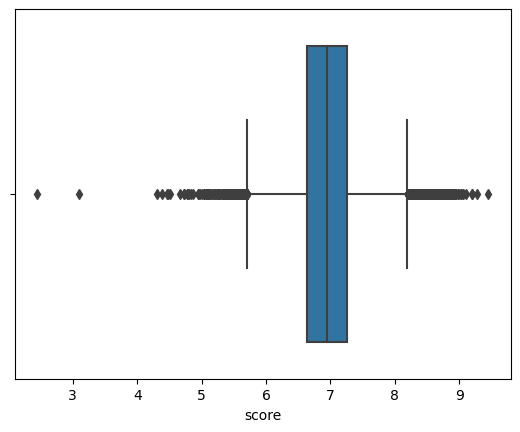

In [11]:
sns.boxplot(x=manga_df['score']);

Biểu đồ boxplot của những manga đã có `score`

In [12]:
X_df = manga_df[~np.isnan(manga_df['score'])][['scored_by', 'members', 'favorites']]
y_sr = manga_df[~np.isnan(manga_df['score'])]['score']

train_X_df, test_X_df, train_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

lngrs = LinearRegression()
lngrs.fit(train_X_df, train_y_sr)

y_pred = lngrs.predict(test_X_df)
print('MSE của mô hình:')
mean_squared_error(test_y_sr, y_pred)

MSE của mô hình:


0.21506504107305977

In [13]:
score_pred = lngrs.predict(manga_df[np.isnan(manga_df['score'])][['scored_by', 'members', 'favorites']])
score_pred = score_pred[:, np.newaxis]
manga_df.loc[np.isnan(manga_df['score']), ['score']] = score_pred
print('Dataframe sau khi thêm score dự đoán:')
manga_df

Dataframe sau khi thêm score dự đoán:


,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.450000,268737,currently_publishing,NaN,NaN,1989-08-25,NaT,551266,103820,True,True,2007-07-17 20:14:45+00:00,2022-06-23 08:30:44+00:00,1989-08-25,NaT,"[Action, Adventure, Award Winning, Drama, Fant...","[Gore, Military, Mythology, Psychological]",[Seinen],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",[Young Animal],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,[Berserk: The Prototype],True
1,13,One Piece,manga,9.200000,305917,currently_publishing,NaN,NaN,1997-07-22,NaT,501291,99526,True,True,2007-07-17 20:14:45+00:00,2022-04-18 04:48:35+00:00,1997-07-22,NaT,"[Action, Adventure, Fantasy]",[],[Shounen],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",[Shounen Jump (Weekly)],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.050000,143879,finished,27.0,116.0,2001-07-12,2010-09-11,264571,28519,True,True,2007-07-17 20:14:45+00:00,2022-06-13 18:46:09+00:00,2001-07-12,2010-09-11,"[Action, Adventure, Award Winning, Drama, Fant...",[Military],[Shounen],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",[Shounen Gangan],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"[Full Metal Alchemist, Hagane no Renkinjutsush...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.270000,125482,finished,24.0,96.0,2004-01-19,2011-04-19,209123,35456,True,True,2007-10-07 08:14:20+00:00,2022-04-18 04:02:35+00:00,2004-01-19,2011-04-19,"[Action, Adventure, Horror, Mystery, Supernatu...",[Historical],"[Seinen, Shounen]","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",[Ultra Jump],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,[JoJo's Bizarre Adventure Part 7: Steel Ball R...,True
4,4632,Oyasumi Punpun,manga,9.030000,141146,finished,13.0,147.0,2007-03-15,2013-11-02,354176,43168,True,True,2008-02-03 15:54:30+00:00,2022-04-18 04:47:05+00:00,2007-03-15,2013-11-02,"[Drama, Slice of Life]",[Psychological],[Seinen],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",[Big Comic Spirits],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67268,149662,Scary Campus College University,manga,6.885506,0,currently_publishing,NaN,NaN,2022-07-25,NaT,0,0,True,False,2022-07-25 00:02:54+00:00,NaT,2022-07-25,NaT,"[Horror, Supernatural, Suspense]",[],[Seinen],[],[],,,https://cdn.myanimelist.net/images/manga/1/265...,https://myanimelist.net/manga/149662,,スケアリー・キャンパス・カレッジ・ユニバーシティ,[],False
67269,149663,"Dorei Tensei: Sono Dorei, Saikyou no Moto Ouji...",light_novel,6.885506,0,currently_publishing,NaN,NaN,2020-09-30,NaT,0,0,True,False,2022-07-25 00:02:54+00:00,NaT,2020-09-30,NaT,"[Action, Adventure, Fantasy]",[],[],[],[],"Ars, the prince of the Kingdom of Karitz, who ...",,https://cdn.myanimelist.net/image

Ta có thể thấy là không còn manga nào bị thiếu `score` nữa

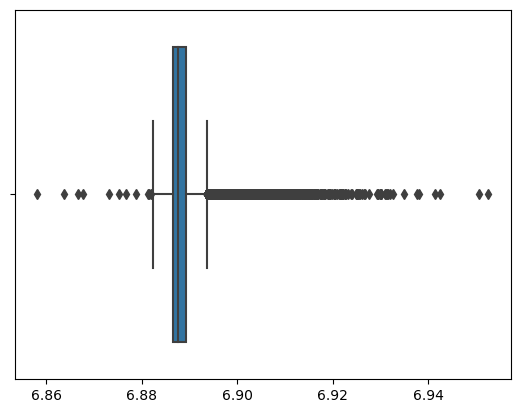

In [14]:
sns.boxplot(x=score_pred);

Biểu đồ boxplot của **`score` dự đoán**. Ta có thể thấy so với boxplot của **`score` có sẵn** ở trên thì biểu đồ này có dữ liệu lệch về bên trái.

### **_01.2. Câu hỏi 02: Thởi điểm bùng nổ manga_**

### **_01.3. Câu hỏi 03: Xếp hạng các mangaka_**

In [15]:
temp1 = manga_df['authors'].explode().apply(lambda col: str(col))
temp2 = temp1.str.findall(r'[0-9]+')
temp3 = temp2.apply(lambda col: col.pop() if len(col) > 0 else np.nan)
temp4 = temp3.to_frame().reset_index()
temp4

,index,authors
0,0,1868
1,0,49592
2,1,1881
3,2,1874
4,3,2619
...,...,...
92067,67268,NaN
92068,67269,NaN
92069,67270,NaN
92070,67271,NaN


Đầu tiên tạo dataframe gồm 2 cột (cột đầu tiên là index của manga, cột thứ hai là id của tác giả), ở đây index lặp lại nhiều lần là manga đó có nhiều tác giả tham gia sáng tác.

In [16]:
temp4.columns = ['manga_index', 'author_id']
temp4['manga_score'] = manga_df.loc[temp4['manga_index']]['score'].reset_index()['score']
temp4 = temp4.drop(columns=['manga_index'])
temp4 = temp4[~temp4['author_id'].isna()]
temp4 = temp4.reset_index().drop(columns='index')
temp4

,author_id,manga_score
0,1868,9.450000
1,49592,9.450000
2,1881,9.200000
3,1874,9.050000
4,2619,9.270000
...,...,...
84544,53367,6.885506
84545,4526,6.885506
84546,54409,6.885506
84547,45352,6.885506


Từ đó ra được dataframe cũng gồm 2 cột (cột đầu tiên là id của tác giả, cột thứ hai là điểm của manga mà tác giả đó tham gia), ở đây id tác giả có thể lặp lại nếu như tác giả đó tham gia sáng tác nhiều manga.

In [17]:
q3_df = temp4.groupby('author_id')['manga_score'].agg(Mean='mean', Count='count')
n_q3_df = (q3_df - q3_df.min()) / (q3_df.max() - q3_df.min())
n_q3_df['Output'] = n_q3_df['Mean'] * 0.9 + n_q3_df['Count'] * 0.1
n_q3_df.sort_values(by=['Output'], ascending=False)

,Mean,Count,Output
author_id,,,
49667,1.000000,0.0,0.900000
49668,1.000000,0.0,0.900000
43112,0.981859,0.0,0.883673
51216,0.970522,0.0,0.873469
56093,0.963719,0.0,0.867347
...,...,...,...
3736,0.183673,0.0,0.165306
13541,0.117914,0.0,0.106122
45506,0.106576,0.0,0.095918


Cuối cùng tạo dataframe gồm 2 cột có index là id tác giả (cột đầu tiên là điểm trung bình các manga mà tác giả này tham gia sáng tác, cột thứ hai là số lượng manga tác giả tham gia), ở đây cả 2 giá trị của 2 cột đều được chuẩn hóa min-max. Sau đó tính tổng tích của 2 cột này với trọng số của nó để ra được cột output là mức độ cống hiến của tác giả đó.